# machine learning models  机器学习模型

## suppervised learning  监督学习

### single model  单模型
- linear model: linear regression, logistic regresssion, Lasso, Ridge  线性模型：线性回归，逻辑回归，套索回归，岭回归
- K-neighbor  k近邻
- decision tree: ID3, C5.0, CART  决策树：ID3, C5.0，CART生成树算法
- neural networks: perceptron, neural nerwork  神经网络：感知机，神经网络
- SVM(support vector machines): linearly separable, linearly support, linearly inseparable  支持向量机：线性可分，线性支持，线性不可分

### integrated learning  集成学习
- Boosting: GBDT, Ada Boost, XG Boost, Light GBM, Cat Boost
- Bagging: random forest

## unsuppervised learning  无监督学习

### clustering  聚类
- k-means
- hierarchical clustering  层次聚类
- general clustering  谱聚类

### dimensionality reduction  降维
- PCA
- SVD
- LDA

## probability learning  概率模型

### EM algorithm

### MCMC

### Bayesian  贝叶斯
- naive Bayes  朴素贝叶斯
- Bayesian networks  贝叶斯网络

### probaility graph  概率图
- CRF
- HMM

### maximum entropy model  最大熵模型


# 命名约定
- 变量名，全部小写，尽量英文单词，做到见名知意，单词之间使用下划线分隔
- 函数名，首字母大写，尽量英文单词，单词之间使用下划线分隔
- 类名，首字母大写，尽量英文单词，单词之间不需要使用下划线分隔
- 在此中可能使用一些常见的算法的缩写以及约定俗成的写法, 例如，梯度下降算法 GD，不需要的变量 _


# 平台环境
**任何不以结婚为目的的谈恋爱，都是耍流氓。**

**任何不解释平台环境的源代码，都是耍流氓。**

**平台环境**
- 计算机硬件架构 ARM & X86
- 操作系统 Windows & Unix & Linux & Mac
- 计算机语言 + 编译器 + 编辑器
- 第三方库的版本


**本平台环境， 源代码可移植性极高**
- 操作系统 Windows 7 64bit X86
- 浏览器 Google Chrome 版本 84.0.4147.105（正式版本） （64 位）
- Jupyter Lab jupyterlab 2.1.4
- Ipython 版本 7.12.0
- Python 版本 python 3.7
- Numpy 版本 1.18.1
- scikit-learn 版本 0.22.1
- matplotlib 版本 3.1.3

X_train shape =  (353, 10)
X_test shape =  (89, 10)
y_train shape =  (353, 1)
y_test shape =  (89, 1)
X_train data =  [[ 0.04534099 -0.04464164 -0.00620595 -0.01599922  0.1250187   0.1251981
   0.019187    0.03430886  0.03243323 -0.0052198 ]
 [ 0.09256399 -0.04464164  0.03690653  0.02187235 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251217 -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 -0.01255635  0.10300346  0.04878988
   0.05600338 -0.00259226  0.08449528 -0.01764612]
 [ 0.09619652 -0.04464164  0.0519959   0.07925353  0.05484511  0.03657709
  -0.07653558  0.1413221   0.09864637  0.06105391]
 [ 0.01264814  0.05068012 -0.02021751 -0.00222774  0.03833367  0.05317396
  -0.00658447  0.03430886 -0.00514531 -0.00936191]]
y_train data =  [[219.]
 [ 70.]
 [202.]
 [230.]
 [111.]]
epoch 0 , loss 30022.909348441928 , 
epoch 1000 , loss 9184.6914033867 , 
epoch 2000 , loss 6331.822694886447 , 
epoch 3000 , loss 5911.074631424646 , 
epoch 4000 , loss 5819.720468869637 , 
epoch 500

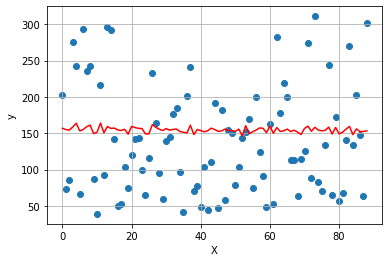

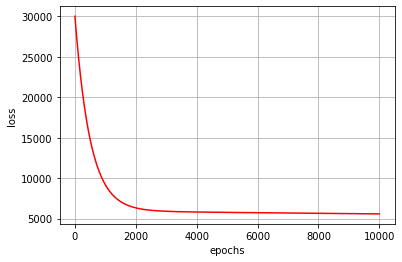

In [13]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 从 scikit-learn 中选择数据集 diabetes
from sklearn.datasets import load_diabetes

# 使用 scikit-learn 的 shuffle 功能，打乱数据集
from sklearn.utils import shuffle

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline

"""
# 定义函数，用于数据准备
# 1、加载数据集
# 2、将数据集打乱无序
# 3、数据集划分训练集 train 和测试集 test
# 4、查看数据集维度情况以及基本信息
"""
def Data_Processing():
    # 加载数据集
    diabetes = load_diabetes()
    # 获取数据矩阵 X
    data = diabetes.data
    # 或者数据标签值
    target = diabetes.target
    
    # 洗牌，打乱数据集
    X, y = shuffle(data, target, random_state=42)
    # 将 数据矩形 X 中数据类型设置为 numpy float32
    X = X.astype(np.float32)
    
    # 划分数据集为 训练集 train，测试集 test
    # train : test = 8 : 2
    split_size = int(X.shape[0] * 0.8)
    # 使用切片完成简单划分
    X_train, y_train = X[:split_size], y[:split_size]
    X_test, y_test = X[split_size:], y[split_size:]
    
    # 标签值 y 的维度变换
    # [n] => [n, 1]
    y_train = y_train.reshape((-1, 1))
    y_test = y_test.reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", y_train[:5])
    
    return X_train, y_train, X_test, y_test

"""
# 定义函数，初始化模型超参数 权重系数 w，偏置或者截距 b
# inputs：数据集维度 n，w需要与数据集进行矩阵乘法
# outputs：权重系数 w，偏置或者截距 b
"""
def Initialize_Hyperparams(dims):
    # w 必须创建为能与数据集 X 进行乘法运算的矩阵
    # 超参数初始化有多种方式
    # 将 w 和 b 全部初始化为 零
    w = np.zeros((dims, 1))
    b = 0
    
    return w, b

"""
# 定义函数，实现 线性模型 核心算法
# inputs：X 矩阵，标签值 y，权重系数 w，偏置或者截距 b
# outputs：预测值 y_hat，误差 loss，权值偏导数 dw，偏置偏导数 db
"""
def Linear_Model(X, y, w, b):
    # 获取数据矩阵 X 的行和列，也就是数据记录，以及特征
    train_num = X.shape[0]
    feature_num = X.shape[1]
    
    # 线性模型，数学公式 y_hat = X @ w + b
    y_hat = np.dot(X, w) + b
    
    # 损失函数计算，loss = (y - y_hat)**2
    loss = np.sum((y_hat - y) **2) / train_num 
    
    # 偏导数计算，数学公式
    dw = np.dot(X.T, (y_hat - y)) / train_num
    db = np.sum((y_hat - y)) / train_num
    
    return y_hat, loss, dw, db

"""
# 定义函数，使用GD梯度下降算法进行训练线性模型
# inputs：数据集 X 矩阵，标签值 y，学习率或者梯度下降步长 learning_rate，对数据训练次数 epochs
# outputs：每一次训练后的误差值列表 loss_list，最后一次训练误差 loss，最终线性模型参数 params，最终梯度值或者偏导数 grads
"""
def Linear_Train_GD(X, y, learning_rate, epochs):
    # 初始化线性模型超参数
    w, b = Initialize_Hyperparams(X.shape[1])
    # 创建列表，储存每次训练误差
    loss_list = []
    
    # 对数据集进行多次训练
    for i in range(epochs):
        # 训练线性模型
        y_hat, loss, dw, db = Linear_Model(X, y, w, b)
        # 将误差加入列表中
        loss_list.append(loss)
        
        # 梯度下降算法，优化算法，找到最优解
        # 更新梯度
        w += -learning_rate * dw
        b += -learning_rate * db
        
        # 每训练 1000 次，查看一下训练误差
        if i % 1000 == 0:
            print("epoch {} , loss {} , ".format(i, loss))
            
    # 训练结束后，保存训练后需要的信息
    # 保存模型超参数，字典形式储存
    params = {"w" : w, "b" : b}
    # 保存梯度信息，字典形式储存
    grads = {"dw" : dw, "db" : db}
        
    return loss_list, loss, params, grads

"""
# 定义函数，使用训练后的参数线性模型进行预测
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Linear_Model_Predict(X, params):
    # 获取训练好的模型的超参数
    w = params["w"]
    b = params["b"]
    
    # 使用训练好的模型进行预测
    y_predict = np.dot(X, w) + b
    
    return y_predict

"""
# 定义函数，可视化测试集的真实值和预测值
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Test_Visualization(X_test, y_test, params):
    # 预测曲线函数
    predict_function = X_test.dot(params["w"]) + params["b"]
    
    # 绘制 测试集 test 的数据点
    plt.scatter(range(X_test.shape[0]), y_test)
    # 绘制预测曲线,拟合数据情况
    plt.plot(predict_function, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    
"""
# 定义函数，可视化训练过程中损失误差 loss 下降过程
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Loss_Visualization(loss_list):
    # 绘制 loss 下降过程，查看训练情况
    plt.plot(loss_list, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
"""
# 定义主函数，完成线性模型算法的整个流程处理
# 0、数据准备
# 1、训练模型
# 2、在测试集 test 上进行预测
# 3、可视化
"""
def main():
    # 数据准备
    X_train, y_train, X_test, y_test = Data_Processing()
    
    # 训练模型
    loss_list, loss, params, _ = Linear_Train_GD(X_train, y_train, 1e-3, 10000)
    
    # 测试集数据进行预测
    y_predict = Linear_Model_Predict(X_test, params)
    
    # 可视化测试集的真实值和预测值
    Test_Visualization(X_test, y_test, params)
    
    # 可视化训练过程中损失误差 loss 下降过程
    Loss_Visualization(loss_list)
    


# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

X_train shape =  (80, 2)
X_test shape =  (20, 2)
y_train shape =  (80, 1)
y_test shape =  (20, 1)
X_train data =  [[ 1.30850667  4.29012214]
 [ 2.77616281  0.48000217]
 [-1.24781122 -1.61288473]
 [-2.16521888  1.59549639]
 [ 2.7629344   0.98818691]]
y_train data =  [[0]
 [1]
 [0]
 [0]
 [1]]


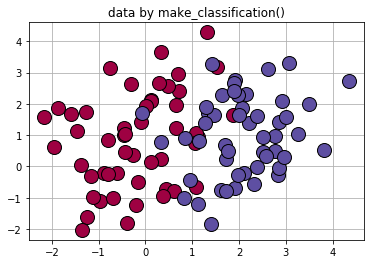

epoch 0 cost 0.6931471805599454
epoch 100 cost 0.5118090302674716
epoch 200 cost 0.4419108732639647
epoch 300 cost 0.40269085039260805
epoch 400 cost 0.37691867505111415
epoch 500 cost 0.3584623277779353
epoch 600 cost 0.3444860766883771
epoch 700 cost 0.33347482228724523
epoch 800 cost 0.32453972587761504
epoch 900 cost 0.3171226970514181
the train accuracy score: 0.8875 
the test accuracy score: 0.9 


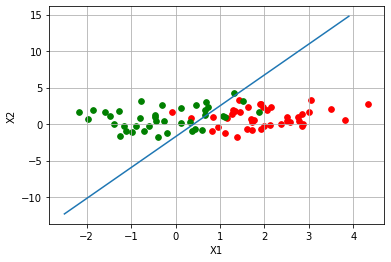

In [17]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline

# 使用 sklearn 生成模拟的二分类数据集
from sklearn.datasets.samples_generator import make_classification

"""
# 定义函数，实现 sigmoid 函数
# inputs：数据 x
# outputs：sigmoid 函数值 z
"""
def Sigmoid(x):
    # sigmoid 函数
    z = 1 / (1 + np.exp(-x))
    
    return z

"""
# 定义函数，初始化模型参数 W 和 b
# inputs：数据集维度 dims
# outputs：返回模型参数 W 和 b
"""
def Initialize_Params(dims):
    # 简单初始化模型超参数为零
    W = np.zeros((dims, 1))
    b = 0
    
    return W, b

"""
# 定义函数，logistics 模型的算法核心
# inputs：数据集矩阵X，标签y，模型参数权重系数矩阵 W，偏置系数 b
# outputs：核心算法模型core_model，交叉损失熵 cost，梯度偏导 dW，db
"""
def Logistic(X, y, W, b):
    # 获取数据集维度信息
    train_size = X.shape[0]
    feature_size = X.shape[1]
    
    # 核心算法模型
    core_model = Sigmoid(np.dot(X, W) + b)
    
    # 计算交叉损失函数
    cost = -1 / train_size * np.sum(y * np.log(core_model) + (1 - y)* np.log(1 - core_model))
    
    # 计算偏导数
    dW = np.dot(X.T, (core_model - y)) / train_size
    db = np.sum(core_model - y) / train_size
    
    # 在机器学习和深度学习中，通常算法的结果是可以表示向量的数组（即包含两对或以上的方括号形式[[]]），
    # 如果直接利用这个数组进行画图可能显示界面为空。
    # 可以利用 squeeze() 函数将表示向量的数组转换为秩为 1 的数组，这样利用matplotlib库函数画图时，就可以正常的显示结果了
    # squeeze 函数删除单维度
    cost = np.squeeze(cost)
    
    return core_model, cost, dW, db

"""
# 定义函数，实现 logistics 模型的训练
# inputs：数据集矩阵X，标签y，梯度下降步长（学习率）learning_rate, 数据集训练次数 epochs
# outputs：每次训练交叉熵列表值 cost_list，模型参数字典params，偏导数参数 grads
"""
def Logistic_Train(X, y, learning_rate, epochs):
    # 初始化模型参数
    W, b = Initialize_Params(X.shape[1])
    
    # 储存每次训练后的交叉熵
    cost_list = []
    
    # 训练模型
    for i in range(epochs):
        # logistic 核心算法
        core_model, cost, dW, db = Logistic(X, y, W, b)
        
        # 更新梯度，迭代优化参数
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        # 每一100 次训练，将交叉熵加入列表，同时打印交叉熵
        if i % 100 == 0:
            cost_list.append(cost)
            print("epoch {} cost {}".format(i, cost))
            
    # 保存最终训练结束后的超参数
    params = {"W" : W, "b" : b}
    
    # 保存最终训练结束后的梯度信息
    grads = {"dW" : dW, "db" : db}
    
    return cost_list, params, grads

"""
# 定义函数，使用训练好的模型参数进行预测数据
# inputs：数据集 X，模型参数 params
# outputs：返回预测结果 y_prediction
"""
def Predict(X, params):
    # 使用训练好的参数预测数据
    y_prediction = Sigmoid(np.dot(X, params['W']) + params['b'])

    # 对预测值概率p，进行分类 if p > 0.5 and 1 或者 else 0
    # 即就是求解最大似然估计统计量
    for i in range(len(y_prediction)):
        # 如果预测概率大于 0.5，划分为 1 这一类
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        # 预测概率低于0.5，则划分为 0 这一类
        else:
            y_prediction[i] = 0
    
    return y_prediction

"""
# 定义函数，计算预测的准确率accuracy
# inputs：真实值y，预测值y_hat
# outputs：准确率accuracy_score
"""
def Accuracy(y, y_hat):
    # 储存计算预测正确的数量
    correct_count = 0
    
    # 统计预测正确的数量
    for i in range(len(y)):
        for j in range(len(y_hat)):
            if y[i] == y_hat[j] and i == j:
                correct_count += 1
    
    # compute accuracy score             
    accuracy_score = correct_count / len(y)
    
    return accuracy_score

"""
# 定义函数，用于模型的数据准备
# 1、生成模型二分类的数据集，
# 2、并添加高斯噪声
# 3、数据集划分训练集 train 和测试集 test
# 4、查看数据集维度情况以及基本信息
"""
def Data_Processing():
    # 生成模型二分类数据集
    X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=2)

    # 生成一组伪随机数
    rng = np.random.RandomState(42)
    
    # 为数据集添加类似高斯白噪声
    X += 2 * rng.uniform(size=X.shape)
    
    # 分类器的类别标签，设置为 2 类
    unique_lables = set(labels)
    
    # 简单划分数据集    
    split_size = int(X.shape[0] * 0.8)
    X_train, y_train = X[:split_size], labels[:split_size].reshape((-1, 1))
    X_test, y_test = X[split_size:], labels[split_size:].reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", y_train[:5])
    
    return X, X_train, y_train, X_test, y_test

"""
# 定义函数，可视化生成的数据分布
# inputs：生成的模型二分类数据集 X
# outputs：matplotlib 绘制数据集分布情况
"""
def Data_Visualization(X): 
    # 设置数据点的颜色
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
    
    # 绘制数据分布
    for k, col in zip(unique_lables, colors):
        x_k = X[labels == k]
        plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k", markersize=14)
    
    # 设置图形的基本信息
    plt.title("data by make_classification()")
    plt.grid()
    plt.show()


"""
# 定义函数，实现 logistic 模型的分类效果可视化
# inputs：训练集数据X_train, y_train, 模型参数 params
# outputs：训练分类结果可视化
"""
def Plot_Logistic(X_train, y_train, params):
    # 数据集维度
    n = X_train.shape[0]
    
    # 储存分类的数据情况
    xcord1 = []
    ycord1 = []
    xcord0 = []    
    ycord0 = []
    
    # 遍历计算添加分类结果
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord0.append(X_train[i][0])
            ycord0.append(X_train[i][1])
            
    # 创建 matplotlib 画布
    fig = plt.figure()
    # 创建 matplotlib 子图
    ax = fig.add_subplot(1, 1, 1)
    # 绘制分类数据散点图
    ax.scatter(xcord1, ycord1, s=32, c='red')
    ax.scatter(xcord0, ycord0, s=32, c='green')
    
    # 绘制分类器的决策边界
    x = np.arange(-2.5, 4, 0.2)
    # 分类器函数决策边界
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]
    # 绘制决策边界
    ax.plot(x, y)
    
    # 设置图形的基本信息
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    plt.show()
    

"""
# 定义主函数，完成 sigmoid 模型算法的整个流程处理
# 0、数据准备
# 1、可视化数据集分布
# 2、训练 logistics 分类器模型
# 3、使用训练的模型预测 test 数据集，并计算准确率 accuracy
# 4、可视化分类器的决策边界
"""
def main():
    # 数据准备
    X, X_train, y_train, X_test, y_test = Data_Processing()
    
    # 可视化数据集分布情况
    Data_Visualization(X)
    
    # 训练模型
    cost_list, params, grads = Logistic_Train(X_train, y_train, 1e-2, 1000)
    
    # 使用训练好的参数进行预测
    y_prediction = Predict(X_test, params)
    # print(y_prediction)
    
    y_train_pred = predict(X_train, params)
    # print(y_train_pred)
    
    # 计算准确率
    accuracy_score_train = Accuracy(y_train, y_train_pred)
    print("the train accuracy score: {} ".format(accuracy_score_train))
    
    accuracy_score_test = Accuracy(y_test, y_prediction)
    print("the test accuracy score: {} ".format(accuracy_score_test))
    
    # 可视化训练分类的决策边界
    Plot_Logistic(X_train, y_train, params)
    

# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

X_train shape =  (105, 4)
X_test shape =  (45, 4)
y_train shape =  (105, 1)
y_test shape =  (45, 1)
X_train data =  [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
y_train data =  [[1]
 [0]
 [2]
 [1]
 [1]]
(45, 105)


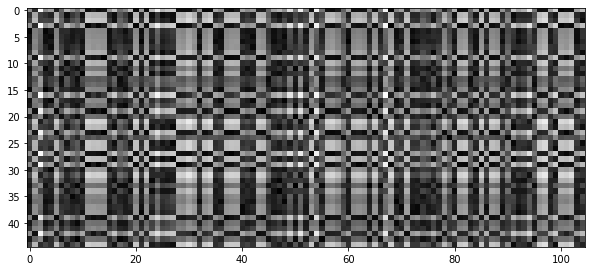

Got 44 / 45 correct => accuracy: 0.977778


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in sqrt


k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 0.952381
k = 3, accuracy = 1.000000
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.952381
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.809524
k = 5, accuracy = 1.000000
k = 5, accuracy = 1.000000
k = 5, accuracy = 1.000000
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.857143
k = 8, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.952381
k = 10, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.904762
k = 12, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.904762
k = 15, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.857143
k = 20, accuracy = 1.000000
k = 20, accu

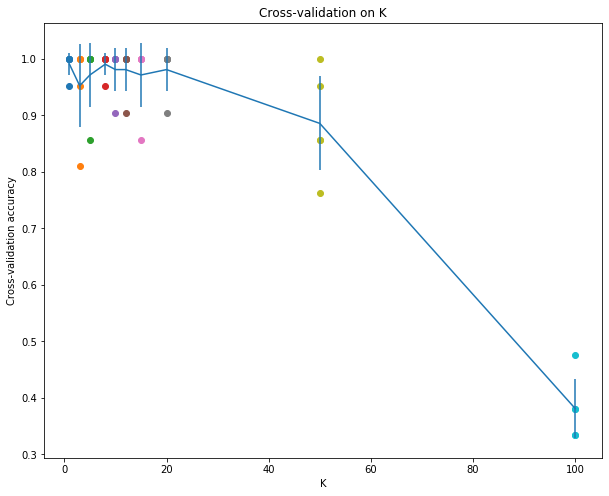

In [8]:
# 矩阵运算
import numpy as np
# 伪随机数
import random

# collections 容器数据类型
# Counter 字典的子类，提供了可哈希对象的计数功能
from collections import Counter

# 导入数据集 iris
from sklearn import datasets
# 随机打乱数据集
from sklearn.utils import shuffle

# 可视化
import matplotlib.pyplot as plt
%matplotlib inline
# 设置图形的属性
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

"""
# 定义函数，准备训练数据
# inputs：
# outputs：X, X_train, y_train, X_test, y_test
"""
def Data_Processing():
    # 加载数据集 iris 鸢尾花分类
    iris = datasets.load_iris()
    
    # 打乱数据集顺序
    X, y = shuffle(iris.data, iris.target, random_state=42)
    
    # 更改数据类型
    X = X.astype(np.float32)
    
    # 简单划分数据集，并进行维度转换
    split_size = int(X.shape[0] * 0.7)
    X_train, y_train = X[:split_size], y[:split_size].reshape((-1, 1))
    X_test, y_test = X[split_size:], y[split_size:].reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", y_train[:5])
    
    return  X, X_train, y_train, X_test, y_test

"""
# 定义函数，计算度量函数——欧式距离 L2距离
# inputs：X 整个数据集， X_train 训练数据集
# outputs：计算结果距离 distance
"""
def Compute_Distance(X, X_train):
    # 数据集大小
    total_num = X.shape[0]
    # 训练集记录大小
    train_num = X_train.shape[0]
    
    # 距离计算储存矩阵
    distance = np.zeros((total_num, train_num))
    
    # 训练集中数据点与整个数据集中数据点的点乘，距离
    dot_multip = np.dot(X, X_train.T)
    # 对数据集中数据点 平方并求和
    X_sum_squares = np.square(X).sum(axis=1)
    # 对训练数据集中数据点 平方并求和
    X_train_sum_squares = np.square(X_train).sum(axis=1)
    
    # 计算欧式距离 平方差公式
    distance = np.sqrt(-2 * dot_multip + X_train_sum_squares + np.matrix(X_sum_squares).T)
    
    return distance

"""
# 定义函数，KNN 核心算法
# inputs：y_train, distance, k
# outputs：y_pred
"""
def Predict(y_train, distance, k=1):
    # 数据点数量
    total_num = distance.shape[0]
    
    # 储存预测结果矩阵
    y_pred = np.zeros(total_num)
    
    # 计算 KNN 
    for i in range(total_num):
        # 储存与数据点最近距离
        closest_y = []
        labels = y_train[np.argsort(distance[i, :])].flatten()
        closest_y = labels[0:k]
        
        c = Counter(closest_y)
        y_pred[i] = c.most_common(1)[0][0]
        
    return y_pred


"""
# 定义函数，交叉验证寻找最佳 K 值
# inputs：X_train, y_train
# outputs：
"""
def Best_K_Cross_Validation(X_train, y_train):
    # 折数
    folds_num = 5
    
    # k 值的选择范围值
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
    
    # 
    X_train_folds = []
    y_train_folds = []
    # 将训练集数据交叉验证划分数据集
    X_train_folds = np.array_split(X_train, folds_num)
    y_train_folds = np.array_split(y_train, folds_num)
    
    # 每一个 k 值对应的准确率
    k_to_accuracies = {}
    
    for k in k_choices:
        for fold in range(folds_num):
            validation_X_test = X_train_folds[fold]
            validation_y_test = y_train_folds[fold]
            temp_X_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:])
            temp_y_train = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])
            
            temp_dists = Compute_Distance(validation_X_test, X_train)
            temp_y_test_pred = Predict(y_train, temp_dists, k=k)
            temp_y_test_pred = temp_y_test_pred.reshape((-1, 1))
            
            num_correct = np.sum(temp_y_test_pred == validation_y_test)
            num_test = validation_X_test.shape[0]
            accuracy = float(num_correct) / num_test
            k_to_accuracies[k] = k_to_accuracies.get(k, []) + [accuracy]
        
    #
    for k in sorted(k_to_accuracies):
        for accuracy in k_to_accuracies[k]:
            print('k = %d, accuracy = %f' % (k, accuracy))
     
    #
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)
        
    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
    
    best_k = k_choices[np.argmax(accuracies_mean)]
    print("最佳 K 值为：", best_k)

    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title("Cross-validation on K")
    plt.xlabel("K")
    plt.ylabel("Cross-validation accuracy")
    plt.show()



"""
# 定义主函数，完成 KNN 算法的整个流程处理
# 0、训练数据准备
# 1、定义距离度量函数：欧式距离、曼哈顿距离、余弦距离、切比雪夫距离
# 2、超参数 K，交叉验证求解最佳 K 值
# 3、决策规则，多数表决分类规则
# 4、可视化
"""
def main():
    # 数据准备
    X, X_train, y_train, X_test, y_test = Data_Processing()
    
    # 计算欧式距离
    distance = Compute_Distance(X_test, X_train)
    print(distance.shape)
    
    # 可视化距离矩阵
    plt.imshow(distance, interpolation='none')
    plt.show()
    
    # 预测分类
    y_test_pred = Predict(y_train, distance, k=1)
    y_test_pred = y_test_pred.reshape((-1, 1))

    # 计算准确率
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / X_test.shape[0]
    print("Got %d / %d correct => accuracy: %f" % (num_correct, X_test.shape[0], accuracy))
    
    # 寻找最佳超参数 k
    Best_K_Cross_Validation(X_train, y_train)


# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

In [12]:
# 矩阵运算
import numpy as py
# csv 文件数据处理
import pandas as pd
# 数学公式 对数 log
from math import log
# 利用 sklearn 的模块实现
from sklearn.datasets import load_iris
from sklearn import tree

# 可视化模块 graphviz
# 需要 pip 安装 graphviz 包
# 操作系统上需要安装 graphhviz 引擎，并配置环境变量
# http://www.graphviz.org/download/
import graphviz

"""
# 定义函数，实现熵的计算
# inputs：ele 列表
# outputs：entropy 熵值
"""
def Entropy(ele):
    # 列表递推式
    probs = [ele.count(i) / len(ele) for i in set(ele)]
    
    # 计算信息熵
    entropy = -sum([prob * log(prob, 2) for prob in probs])
    
    return entropy

"""
# 定义函数，根据特征和特征值对数据进行划分
# inputs：data DataFrame数据，col 数据列名
# outputs：result_dict 字典
"""
def Split_Dataframe(data, col):
    # 获取唯一列名
    unique_values = data[col].unique()
    
    # 字典推导式
    result_dict = {elem : pd.DataFrame for elem in unique_values}
    
    # 根据 列 划分数据
    for key in result_dict.keys():
        result_dict[key] = data[:][data[col] == key]
        
    return result_dict

"""
# 定义函数，根据熵计算和数据划分来计算 信息增益 来选择最佳特征过程
# inputs: df_data 数据集， label 标签
# outputs: 最大信息增益，最佳特征
"""
def Choose_Best_Feature(df_data, label):
    # 计算标签的信息熵
    entropy_D = Entropy(df_data[label].tolist())
    
    # 列表推导式
    cols = [col for col in df_data.columns if col not in [label]]
    
    # 初始化最大信息增益 最佳特征 划分情况
    max_value, best_feature = -999, None
    max_splited = None
    
    # 基于不同的特征划分数据集
    for col in cols:
        # 根据特征划分数据集
        splited_set = Split_Dataframe(df_data, col)
        
        # 计算信息熵
        entropy_DA = 0
        for subset_col, subset in splited_set.items():
            # 计算标签特征的熵
            entropy_Di = Entropy(subset[label].tolist())
            entropy_DA += len(subset) / len(df_data) * entropy_Di
            
        # 计算信息增益
        info_gain = entropy_D - entropy_DA
        
        # 更新参数，最大信息增益，最佳特征以及划分情况
        if info_gain > max_value:
            max_value, best_feature = info_gain, col
            max_splited = splited_set
            
    return max_value, best_feature, max_splited

"""
# 定义函数，实现决策树的可视化过程
# inputs：
# outputs：
"""
def Decision_Tree_visualization():
    # 加载 iris 数据集
    iris = load_iris()
    
    clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
    clf = clf.fit(iris.data, iris.target)
    
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, 
                                   class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
    
    graph = graphviz.Source(dot_data)
    # 参数分别为文件名、文件保存路径、是否用默认程序打开渲染效果、是否在渲染后删除源文件    
    # render(filename=None, directory=None, view=False, cleanup=False)
    graphviz.render("./datasets/graphviz.gv", view=True)


"""
# 定义类，根据函数定义 ID3 算法，在类中构造ID3决策树的方法
"""
class ID3Tree:
    # define a Node class
    class Node:
        def __init__(self, name):
            self.name = name
            self.connections = {}

        def connect(self, label, node):
            self.connections[label] = node
            
    def __init__(self, data, label):
        self.columns = data.columns
        self.data = data
        self.label = label
        self.root = self.Node("Root")
    
    # print tree method
    def print_tree(self, node, tabs):
        print(tabs + node.name)
        for connection, child_node in node.connections.items():
            # print(tabs + "\t" + "(" + connection + ")")
            print(tabs + "\t" + "(", end = "")
            print(connection, end = "")
            print(")", end = "")
            self.print_tree(child_node, tabs + "\t\t")
    
    def construct_tree(self):
        self.construct(self.root, "", self.data, self.columns)
    
    # construct tree
    def construct(self, parent_node, parent_connection_label, input_data, columns):
        max_value, best_col, max_splited = Choose_Best_Feature(input_data[columns], self.label)
        
        if not best_col:
            node = self.Node(input_data[self.label].iloc[0])
            parent_node.connect(parent_connection_label, node)
            return

        node = self.Node(best_col)
        parent_node.connect(parent_connection_label, node)
        
        new_columns = [col for col in columns if col != best_col]
        
        # Recursively constructing decision trees
        for splited_value, splited_data in max_splited.items():
            self.construct(node, splited_value, splited_data, new_columns)
    
"""
# 定义主函数，完成 ID3 算法 生成决策树的整个流程处理
# 0、数据准备
# 1、计算信息熵
# 2、计算信息增益
# 3、ID3 决策树
"""
def main():
    # 加载 csv文件数据
    df_data = pd.read_csv("./datasets/example_data.csv")
    print(df_data.head())
    
    # 计算熵
    entropy_play = Entropy(df_data['play'].tolist())
    print(entropy_play)
    
    # 根据 temp 和其他三个特征值划分数据
    split_example = Split_Dataframe(df_data, "temp")
    print(split_example)
    
    # 信息增益最大
    max_value, best_feature, max_splited = Choose_Best_Feature(df_data, "play")
    print(max_value)
    print(best_feature)
    print(max_splited)
    
    # ID3 决策树
    tree_ID3 = ID3Tree(df_data, 'play')
    tree_ID3.construct_tree()
    tree_ID3.print_tree(tree_ID3.root, "")
    
    # 可视化 利用 sklearn中 tree
    # graphviz 可视化模型，dot 语言可视化


# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

  humility   outlook play  temp  windy
0     high     sunny   no   hot  False
1     high     sunny   no   hot   True
2     high  overcast  yes   hot  False
3     high     rainy  yes  mild  False
4   normal     rainy  yes  cool  False
0.9402859586706309
{'hot':    humility   outlook play temp  windy
0      high     sunny   no  hot  False
1      high     sunny   no  hot   True
2      high  overcast  yes  hot  False
12   normal  overcast  yes  hot  False, 'mild':    humility   outlook play  temp  windy
3      high     rainy  yes  mild  False
7      high     sunny   no  mild  False
9    normal     rainy  yes  mild  False
10   normal     sunny  yes  mild   True
11     high  overcast  yes  mild   True
13     high     rainy   no  mild   True, 'cool':   humility   outlook play  temp  windy
4   normal     rainy  yes  cool  False
5   normal     rainy   no  cool   True
6   normal  overcast  yes  cool   True
8   normal     sunny  yes  cool  False}
0.2467498197744391
outlook
{'sunny':    humility o

In [17]:
import numpy as np
import pandas as pd

"""
# 定义函数，计算 Gini 指数
# inputs：nums 待计算的数据, 列表类型
# outputs： gini 返回 Gini 指数
"""
def Gini(nums):
    # 列表推导式
    probs = [nums.count(i)/len(nums) for i in set(nums)]
    
    # 计算 Gini 指数
    gini = sum([p*(1-p) for p in probs])
    
    return gini

"""
# 定义函数，根据特征分割数据
# inputs：data 数据集， col 特征列
# outputs：result_dict
"""
def split_dataframe(data, col):
    # unique value of column
    unique_values = data[col].unique()
    
    # empty dict of dataframe
    result_dict = {elem : pd.DataFrame for elem in unique_values}
    
    # split dataframe based on column value
    for key in result_dict.keys():
        result_dict[key] = data[:][data[col] == key]
        
    return result_dict


"""
# 定义函数，根据 Gini 指数和条件Gini指数计算递归选择最优特征
# inputs：df 数据集，标签 label
# outputs：最大信息增益，最佳特征，划分情况
"""
def choose_best_col(df, label):
    # Calculating label's gini index
    gini_D = Gini(df[label].tolist())
    
    # columns list except label
    cols = [col for col in df.columns if col not in [label]]
    
    # initialize the max infomation gain, best column and best splited dict
    min_value, best_col = 999, None
    min_splited = None
    
    # split data based on different column
    for col in cols:
        splited_set = split_dataframe(df, col)
        gini_DA = 0
        for subset_col, subset in splited_set.items():
            # calculating splited dataframe label's gini index
            gini_Di = Gini(subset[label].tolist())
            # calculating gini index of current feature
            gini_DA += len(subset)/len(df) * gini_Di
        
        if gini_DA < min_value:
            min_value, best_col = gini_DA, col
            min_splited = splited_set
            
    return min_value, best_col, min_splited

"""
# 定义类，根据函数定义 CART 算法，在类中构造决策分类树
"""
class CARTTree:    
    # define a Node class
    class Node:        
        def __init__(self, name):
            self.name = name
            self.connections = {}    
            
        def connect(self, label, node):
            self.connections[label] = node    
        
    def __init__(self, data, label):
        self.columns = data.columns
        self.data = data
        self.label = label
        self.root = self.Node("Root")    
    
    # print tree method
    def print_tree(self, node, tabs):
        print(tabs + node.name)        
        for connection, child_node in node.connections.items():
            # print(tabs + "\t" + "(" + connection + ")")
            print(tabs + "\t" + "(", end = "")
            print(connection, end = "")
            print(")", end = "")
            self.print_tree(child_node, tabs + "\t\t")    
    
    def construct_tree(self):
        self.construct(self.root, "", self.data, self.columns)    
    
    # construct tree
    def construct(self, parent_node, parent_connection_label, input_data, columns):
        min_value, best_col, min_splited = choose_best_col(input_data[columns], self.label)   
        if not best_col:
            node = self.Node(input_data[self.label].iloc[0])
            parent_node.connect(parent_connection_label, node)            
            return

        node = self.Node(best_col)
        parent_node.connect(parent_connection_label, node)

        new_columns = [col for col in columns if col != best_col]        
        # Recursively constructing decision trees
        for splited_value, splited_data in min_splited.items():
            self.construct(node, splited_value, splited_data, new_columns)


"""
# 定义主函数，完成 CART 算法 生成决策树的整个流程处理
# 0、数据准备
# 1、计算 Gini 指数
# 2、递归选择最佳参数
# 3、CART 决策树
"""
def main():
    # 计算例子,测试 Gini 指数
    lst = ['a', 'b', 'c', 'd', 'b', 'c', 'a', 'b', 'c', 'd', 'a']
    print(Gini(lst))
    
    # 加载 csv文件数据，并计算书标签的 Gini 指数
    df_data = pd.read_csv("./datasets/example_data.csv")
    print(df_data['play'].tolist())
    
    # 根据 温度特征 划分数据
    split_example = split_dataframe(df_data, "temp")
    print(split_example)
    
    # 根据 Gini 指数和条件指数计算递归选择最优特征
    min_value, best_col, min_splited = choose_best_col(df_data, 'play')
    print(min_value)
    print(best_col)
    print(min_splited)
    
    # CART 决策分类树
    CART_tree = CARTTree(df_data, 'play')
    CART_tree.construct_tree()
    CART_tree.print_tree(CART_tree.root, "")
    

# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

0.743801652892562
['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
{'hot':    humility   outlook play temp  windy
0      high     sunny   no  hot  False
1      high     sunny   no  hot   True
2      high  overcast  yes  hot  False
12   normal  overcast  yes  hot  False, 'mild':    humility   outlook play  temp  windy
3      high     rainy  yes  mild  False
7      high     sunny   no  mild  False
9    normal     rainy  yes  mild  False
10   normal     sunny  yes  mild   True
11     high  overcast  yes  mild   True
13     high     rainy   no  mild   True, 'cool':   humility   outlook play  temp  windy
4   normal     rainy  yes  cool  False
5   normal     rainy   no  cool   True
6   normal  overcast  yes  cool   True
8   normal     sunny  yes  cool  False}
0.34285714285714286
outlook
{'sunny':    humility outlook play  temp  windy
0      high   sunny   no   hot  False
1      high   sunny   no   hot   True
7      high   sunny   no  mild  False
8

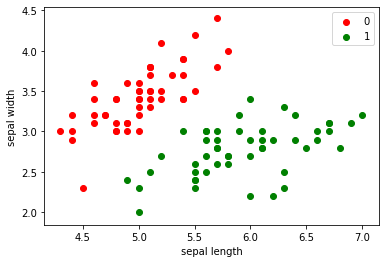

There is no mis-classification!
{'w': array([ 0.79 , -1.007]), 'b': -1.2400000000000009}


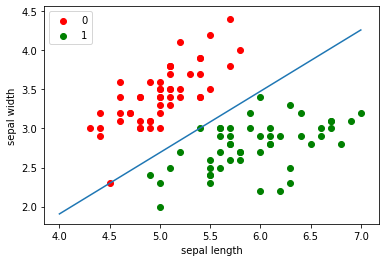

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris


"""
# 定义函数，准备数据
# inputs：
# outputs：df
"""
def Data_Processing():
    # loading dataset
    iris = load_iris()
    
    # transform to pd.DataFrame
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["label"] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    
    # transform label to 1/-1
    data = np.array(df.iloc[:100, [0, 1, -1]])
    X, y = data[:, :-1], data[:, -1]
    y = np.array([1 if i==1 else -1 for i in y])
    
    return df, X, y, data

"""
# 定义函数，可视化数据集中数据点
# inputs：
# outputs：
"""
def Plot_DataFrame(df):
    plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
    plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='green', label='1')
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()
    plt.show()
    
"""
# 定义函数，初始化单层感知机线性可分模型参数 w b
# inputs：数据维度
# outputs：线性模型超参数 w b
"""
def Initialize_With_Zeros(dims):
    w = np.zeros(dims)
    b = 0.0
    
    return w, b

"""
# 定义函数，实现 sign 符号函数
# inputs：X， w， b
# outputs：sign function
"""
def Sign_Function(X, w, b):
    return np.dot(X, w) + b

"""
# 定义函数，训练模型
# inputs：X_train, y_train, learning_rate
# outputs：params
"""
def Single_Perceptron_Train(X_train, y_train, learning_rate):
    # initialize the hypeparams for single perceptron with linear 
    w, b = Initialize_With_Zeros(X_train.shape[1])
    
    # 初始化误分类
    is_wrong = False
    while not is_wrong:
        wrong_count = 0
        for i in range(len(X_train)):
            X = X_train[i]
            y = y_train[i]
            
            # 如果存在误分类，则更新参数，直到没有误分类点
            if y * Sign_Function(X, w, b) <= 0:
                w = w + learning_rate * np.dot(y, X)
                b = b + learning_rate * y
                wrong_count += 1
        if wrong_count == 0:
            is_wrong = True
            print("There is no mis-classification!")
            
    # saving the hypeparams
    params = {'w' : w, 'b' : b}
    
    return params

"""
# 定义函数，可视化训练结果，决策边界
# inputs：params, data
# outputs：
"""
def Visualize_Decision_Boundary(params, data):
    # 决策边界，线性超平面
    x_points = np.linspace(4, 7, 10)
    y_hat = -(params["w"][0] * x_points + params["b"]) / params["w"][1]
    
    # 绘制决策边界
    plt.plot(x_points, y_hat)
    
    #plt.plot(data[:50, 0], data[:50, 1], color='red', label='0')
    plt.scatter(data[:50, 0], data[:50, 1], color='red', label='0')
    #plt.plot(data[50:100, 0], data[50:100, 1], color='green', label='1')
    plt.scatter(data[50:100, 0], data[50:100, 1], color='green', label='1')

    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()
    plt.show()
    
    
"""
# 定义主函数，完成 单层感知机 线性可分的整个流程处理
# 0、数据准备
# 1、可视化数据集中的数据点
# 2、训练模型
# 3、可视化训练结果，决策边界
"""
def main():
    # data processing for single perceptron with linear dataset
    df, X, y, data = Data_Processing()
    
    # visualize the data for the dataset
    Plot_DataFrame(df)
    
    # training
    params = Single_Perceptron_Train(X, y, 1e-2)
    print(params)
    
    # visualize decision boundary
    Visualize_Decision_Boundary(params, data)
    

# 执行所有代码
# if __name__ == "__main__":
#     main()
main() 

Cost after iteration 0: 0.693170
Cost after iteration 1000: 0.194075
Cost after iteration 2000: 0.181268
Cost after iteration 3000: 0.175473
Cost after iteration 4000: 0.171913
Cost after iteration 5000: 0.169363
Cost after iteration 6000: 0.167395
Cost after iteration 7000: 0.165827
Cost after iteration 8000: 0.164542
Cost after iteration 9000: 0.163462
Accuracy: 95%
Accuracy for 1 hidden units: 72.0 %
Accuracy for 2 hidden units: 68.75 %
Accuracy for 3 hidden units: 95.0 %
Accuracy for 4 hidden units: 95.0 %
Accuracy for 5 hidden units: 95.0 %
Accuracy for 10 hidden units: 95.0 %
Accuracy for 20 hidden units: 95.25 %


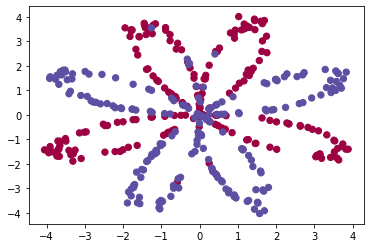

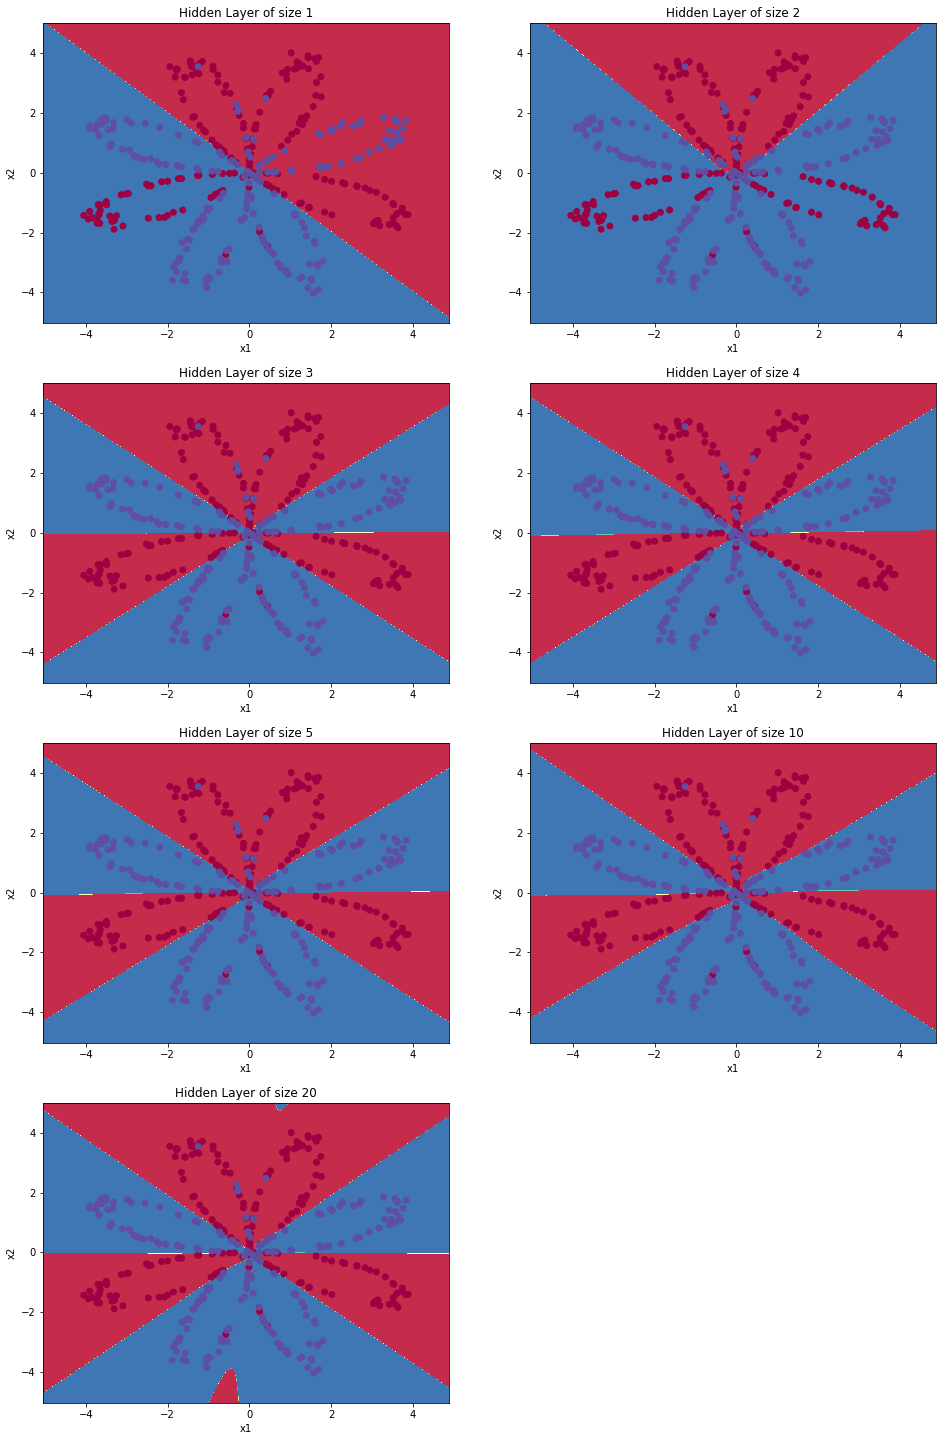

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
# 定义函数，准备数据
# inputs：
# outputs：X, Y
"""
def Create_Dataset():
    np.random.seed(42)
    # 数据量
    m = 400
    # 每个标签的实例数量
    N = int(m/2)
    # 数据维度
    D = 2
    # data matrix
    X = np.zeros((m, D))
    # labael dims
    Y = np.zeros((m, 1), dtype='uint8')
    a = 4
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

"""
# 定义函数，定义网络结构
# inputs：
# outputs：
"""
def Layer_Sizes(X, Y):
    # input layer size
    n_x = X.shape[0]
    # hidden layer size
    n_h = 4 
    # output layer size
    n_y = Y.shape[0] 
    
    return (n_x, n_h, n_y)

"""
# 定义函数，初始化模型参数
# inputs：n_x, n_h, n_y 数据维度
# outputs：parameters 模型参数
"""
def Initialize_Parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1)) 
   
    # 保证数据维度和参数维度一致
    # 可以进行矩阵运算
    assert (W1.shape == (n_h, n_x))    
    assert (b1.shape == (n_h, 1))    
    assert (W2.shape == (n_y, n_h))    
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1, "b1": b1,                 
                  "W2": W2, "b2": b2}   
                   
    return parameters

"""
# 定义函数，实现 sigmoid 函数
# inputs：数据 x
# outputs：sigmoid 函数值 z
"""
def Sigmoid(x):
    # sigmoid 函数
    s = 1 / (1 + np.exp(-x))
    
    return s

"""
# 定义函数，前向传播
# inputs：X, parameters
# outputs：A2, cache
"""
def Forward_Propagation(X, parameters):
    # 获取各参数初始值
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 执行前向计算
    Z1 = np.dot(W1, X) + b1
    # hidden layer activation function tanh
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    # output layer activation function sigmoid
    A2 = Sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1, "A1": A1,                   
             "Z2": Z2, "A2": A2}    

    return A2, cache

"""
# 定义函数，计算交叉熵 损失函数计算
# inputs: A2, Y, parameters
# outputs: cost
"""
def Compute_Cost(A2, Y, parameters):
    # 训练样本量
    m = Y.shape[1] 
    
    # 计算交叉熵损失
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1/m * np.sum(logprobs)
    
    # 维度压缩
    cost = np.squeeze(cost)   
    assert(isinstance(cost, float)) 
    
    return cost

"""
# 定义函数，反向传播
# inputs：parameters, cache, X, Y
# outputs：grads
"""
def Backward_Propagation(parameters, cache, X, Y):
    m = X.shape[1]    
    # 获取W1和W2
    W1 = parameters['W1']
    W2 = parameters['W2']    
    # 获取A1和A2
    A1 = cache['A1']
    A2 = cache['A2'] 
    
    # 执行反向传播
    dZ2 = A2-Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1,                      
             "dW2": dW2, "db2": db2}
    
    return grads


"""
# 定义函数，更新权值
# inputs：parameters, grads, learning_rate=1.2
# outputs：parameters
"""
def Update_Parameters(parameters, grads, learning_rate=1.2):
    # 获取参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']   
    
    # 获取梯度
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2'] 
    
    # 参数更新
    W1 -= dW1 * learning_rate
    b1 -= db1 * learning_rate
    W2 -= dW2 * learning_rate
    b2 -= db2 * learning_rate

    parameters = {"W1": W1,  "b1": b1,            
                  "W2": W2,  "b2": b2}
    
    return parameters

"""
# 定义函数，前向传播 + 计算损失 + 反向传播 + 权值更新 的神经网络模型
# inputs：X, Y, n_h, num_iterations=10000, print_cost=False
# outputs：parameters
"""
def NN_Model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = Layer_Sizes(X, Y)[0]
    n_y = Layer_Sizes(X, Y)[2] 
    
    # 初始化模型参数
    parameters = Initialize_Parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2'] 
    
    # 梯度下降和参数更新循环
    for i in range(0, num_iterations):        
        # 前向传播计算
        A2, cache = Forward_Propagation(X, parameters)        
        # 计算当前损失
        cost = Compute_Cost(A2, Y, parameters)        
        # 反向传播
        grads = Backward_Propagation(parameters, cache, X, Y)        
        # 参数更新
        parameters = Update_Parameters(parameters, grads, learning_rate=1.2)        
        # 打印损失
        if print_cost and i % 1000 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))    
            
    return parameters

"""
# 定义函数，基于训练结果的预测函数
# inputs：parameters, X)
# outputs：predictions
"""
def Predict(parameters, X):
    A2, cache = Forward_Propagation(X, parameters)
    
    predictions = (A2>0.5)
    
    return predictions

"""
# 定义函数，决策边界
# inputs：model, X, y
# outputs：
"""
def Plot_Decision_Boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


"""
# 定义主函数，完成 多层感知机（神经网络） 的整个流程处理
# 0、数据准备并可视化数据点
# 1、创建网络并训练
# 2、预测网络准确率
# 3、可视化决策边界
"""
def main():
    # dataset and visualize the data
    X, Y = Create_Dataset()
    plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)
    
    # taraing NN
    parameters = NN_Model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)
    
    # 预测准确率
    predictions = Predict(parameters, X)
    print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
    
    # visualize decision boundary
    plt.figure(figsize=(16, 32))
    hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
    for i, n_h in enumerate(hidden_layer_sizes):
        plt.subplot(5, 2, i+1)
        plt.title('Hidden Layer of size %d' % n_h)
        parameters = NN_Model(X, Y, n_h, num_iterations = 5000)
        Plot_Decision_Boundary(lambda x: Predict(parameters, x.T), X, Y[0])
        predictions = Predict(parameters, X)
        accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
        print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    

# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

Optimized a step!
Optimized a step!
Optimized a step!
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


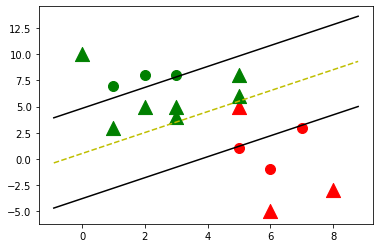

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
# 定义类，实现 线性可分支持向量机
"""
class Hard_Margin_SVM:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'g'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
    
    # 定义训练函数
    def train(self, data):
        self.data = data
        # 参数字典 { ||w||: [w,b] }
        opt_dict = {}
        
        # 数据转换列表
        transforms = [[1, 1],
                      [-1, 1],
                      [-1, -1],
                      [1, -1]]
        
        # 从字典中获取所有数据
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        # 获取数据最大最小值
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # 定义一个学习率(步长)列表
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001
                      ]
        
        # 参数b的范围设置
        b_range_multiple = 2
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10
        
        # 基于不同步长训练优化
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            # 凸优化
            optimized = False
            while not optimized:
                for b in np.arange(-1 * (self.max_feature_value * b_range_multiple),
                                   self.max_feature_value * b_range_multiple,
                                   step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    # print(xi,':',yi*(np.dot(w_t,xi)+b))
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!')
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict])
            # ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2
        
        for i in self.data:
            for xi in self.data[i]:
                yi = i
                print(xi, ':', yi * (np.dot(self.w, xi) + self.b))
                
                # 定义预测函数
    
    def predict(self, features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='^', c=self.colors[classification])
        return classification
    
    # 定义结果绘图函数
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        # 定义线性超平面
        def hyperplane(x, w, b, v):
            return (-w[0] * x - b + v) / w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # 正支持向量
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        # (w.x+b) = -1
        # 负支持向量
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        # (w.x+b) = 0
        # 线性分隔超平面
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()


"""
# 0、数据准备
# 1、创建模型并训练
# 2、预测模型
# 3、可视化决策边界
"""
# 准备数据
data_dict = {-1: np.array([[1, 7], [2, 8], [3, 8], ]),
             1: np.array([[5, 1],  [6, -1],[7, 3], ])}
    
# 创建线性可分 SVM 并训练
svm = Hard_Margin_SVM()
svm.train(data=data_dict)
    
predict_us = [[0, 10], [1, 3], [3, 4], [3, 5], [5, 5], 
              [5, 6], [6, -5], [5, 8], [2, 5], [8, -3]]
    
# 预测
for p in predict_us:
    svm.predict(p)
        
# 可视化
svm.visualize()

     pcost       dcost       gap    pres   dres
 0:  1.4050e+05 -9.2239e+07  2e+08  6e-01  8e-12
 1:  4.1922e+05 -1.7059e+07  3e+07  5e-02  1e-11
 2:  3.6995e+05 -2.7695e+06  4e+06  6e-03  4e-12
 3:  1.0089e+05 -5.3541e+05  7e+05  6e-04  3e-12
 4:  3.5076e+03 -6.0166e+04  6e+04  7e-13  3e-12
 5: -2.9181e+03 -1.3577e+04  1e+04  7e-13  2e-12
 6: -4.1933e+03 -1.3447e+04  9e+03  9e-13  3e-12
 7: -3.0105e+03 -1.2208e+04  9e+03  2e-13  2e-12
 8: -4.7770e+03 -1.0677e+04  6e+03  4e-13  2e-12
 9: -5.5445e+03 -1.0666e+04  5e+03  3e-12  3e-12
10: -5.5258e+03 -9.3346e+03  4e+03  9e-13  3e-12
11: -5.7122e+03 -9.4637e+03  4e+03  1e-12  2e-12
12: -6.7442e+03 -8.3839e+03  2e+03  2e-12  4e-12
13: -6.7781e+03 -8.2049e+03  1e+03  8e-13  3e-12
14: -7.0230e+03 -7.7282e+03  7e+02  6e-13  4e-12
15: -7.1314e+03 -7.6617e+03  5e+02  3e-12  4e-12
16: -7.1338e+03 -7.5118e+03  4e+02  2e-12  4e-12
17: -7.3089e+03 -7.3191e+03  1e+01  5e-13  4e-12
18: -7.3134e+03 -7.3135e+03  1e-01  3e-13  5e-12
19: -7.3134e+03 -7.31

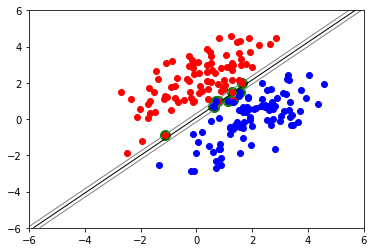

In [5]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt
%matplotlib inline

"""
# 定义类，实现 支持线性可分支持向量机
"""


def linear_kernel(x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p


def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))


class soft_margin_svm(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None:
            self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))


if __name__ == "__main__":

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0, 0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:] 
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test


    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        plt.plot(X1_train[:, 0], X1_train[:, 1], "ro")
        plt.plot(X2_train[:, 0], X2_train[:, 1], "bo")
        plt.scatter(clf.sv[:, 0], clf.sv[:, 1], s=100, c="g")

        # w.x + b = 0
        a0 = -4;
        a1 = f(a0, clf.w, clf.b)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b)
        plt.plot([a0, b0], [a1, b1], "k")

        # w.x + b = 1
        a0 = -4;
        a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b, 1)
        plt.plot([a0, b0], [a1, b1], "k--")

        # w.x + b = -1
        a0 = -4;
        a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b, -1)
        plt.plot([a0, b0], [a1, b1], "k--")

        plt.axis("tight")
        plt.show()


    def plot_contour(X1_train, X2_train, clf):
        plt.plot(X1_train[:, 0], X1_train[:, 1], "ro")
        plt.plot(X2_train[:, 0], X2_train[:, 1], "bo")
        plt.scatter(clf.sv[:, 0], clf.sv[:, 1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        plt.axis("tight")
        plt.show()


    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train == 1], X_train[y_train == -1], clf)


    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = soft_margin_svm(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train == 1], X_train[y_train == -1], clf)


    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = soft_margin_svm(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train == 1], X_train[y_train == -1], clf)


    # test_linear()
    # test_non_linear()
    test_soft()


     pcost       dcost       gap    pres   dres
 0: -4.1133e+01 -9.6264e+01  1e+03  3e+01  2e+00
 1: -6.6141e+01 -8.0287e+01  6e+02  2e+01  1e+00
 2: -1.2115e+01 -4.3478e+00  2e+02  4e+00  3e-01
 3: -1.2723e+01 -3.0747e+00  1e+02  3e+00  2e-01
 4: -1.0289e-01 -6.7895e-01  4e+00  7e-02  5e-03
 5: -1.3791e-02 -4.0813e-01  1e+00  1e-02  1e-03
 6: -8.5553e-02 -2.3493e-01  3e-01  4e-03  3e-04
 7: -1.2775e-01 -2.1348e-01  1e-01  8e-04  6e-05
 8: -1.6016e-01 -1.9337e-01  4e-02  6e-05  4e-06
 9: -1.7398e-01 -1.8712e-01  1e-02  2e-05  1e-06
10: -1.8060e-01 -1.8563e-01  5e-03  2e-16  3e-14
11: -1.8434e-01 -1.8506e-01  7e-04  1e-16  3e-14
12: -1.8495e-01 -1.8496e-01  1e-05  7e-17  3e-14
13: -1.8495e-01 -1.8495e-01  2e-07  7e-17  3e-14
14: -1.8495e-01 -1.8495e-01  5e-09  3e-17  3e-14
Optimal solution found.
9 support vectors out of 180 points
19 out of 20 predictions correct


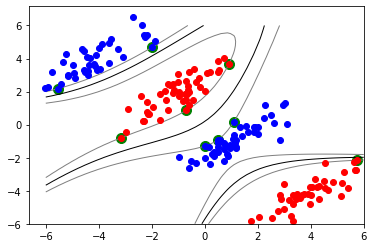

In [4]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt
%matplotlib inline


"""
# 定义类，实现 非线性 支持向量机
"""


def linear_kernel(x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p


def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))


class soft_margin_svm(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None:
            self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))


if __name__ == "__main__":

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0, 0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train


    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test


    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:, 0], X1_train[:, 1], "ro")
        pl.plot(X2_train[:, 0], X2_train[:, 1], "bo")
        pl.scatter(clf.sv[:, 0], clf.sv[:, 1], s=100, c="g")

        # w.x + b = 0
        a0 = -4;
        a1 = f(a0, clf.w, clf.b)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b)
        pl.plot([a0, b0], [a1, b1], "k")

        # w.x + b = 1
        a0 = -4;
        a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0, b0], [a1, b1], "k--")

        # w.x + b = -1
        a0 = -4;
        a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4;
        b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0, b0], [a1, b1], "k--")

        pl.axis("tight")
        pl.show()


    def plot_contour(X1_train, X2_train, clf):
        plt.plot(X1_train[:, 0], X1_train[:, 1], "ro")
        plt.plot(X2_train[:, 0], X2_train[:, 1], "bo")
        plt.scatter(clf.sv[:, 0], clf.sv[:, 1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        plt.axis("tight")
        plt.show();


    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train == 1], X_train[y_train == -1], clf)


    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = soft_margin_svm(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train == 1], X_train[y_train == -1], clf)


    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = soft_margin_svm(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train == 1], X_train[y_train == -1], clf)


    # test_linear()
    test_non_linear()
#     test_soft()

In [1]:
import numpy as np
import pandas as pd


def Create_Dataset():
    """
    # 定义函数，创建实验数据集
    # inputs：
    # outputs：
    """
    x1 = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
    x2 = ['S', 'M', 'M', 'S', 'S', 'S', 'M', 'M', 'L', 'L', 'L', 'M', 'M', 'L', 'L']
    y = [-1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1]
    
    return x1, x2, y

def Naive_Bayes(X, y):
    """
    # 定义函数，训练朴素贝叶斯
    # inputs：特征数据X，标签y
    # outputs：classes, class_prior, prior
    """
    classes = y[y.columns[0]].unique()
    class_count = y[y.columns[0]].value_counts()

    # 类先验概率
    class_prior = class_count / len(y)
    # 计算类条件概率
    prior = dict()
    
    for col in X.columns:
        for j in classes:
            p_x_y = X[(y == j).values][col].value_counts()
            for i in p_x_y.index:
                prior[(col, i, j)] = p_x_y[i] / class_count[j]

    return classes, class_prior, prior

def Predict(X_test):
    """
    # 定义预测函数
    # inputs：测试数据 X_test
    # outputs：
    """
    res = []
    for c in classes:
        p_y = class_prior[c]
        p_x_y = 1
        for i in X_test.items():
             p_x_y *= prior[tuple(list(i) + [c])]
        res.append(p_y * p_x_y)
    
    return classes[np.argmax(res)]


"""
# 主函数，完成整个流程
# 0、读取数据集
# 1、训练朴素贝叶斯
# 2、预测给定数据的类别
"""
if __name__ == "__main__":
    #
    # 读取数据集
    x1, x2, y = Create_Dataset()
    
    # 将数据读取 DataFrame 
    df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
    print(df)
    
    # get features and labels
    X = df[['x1', 'x2']]
    y = df[['y']]
    X_test = {'x1': 2, 'x2': 'S'}
    
    # training the naive bayes
    classes, class_prior, prior = Naive_Bayes(X, y)
    
    # predict with testset
    predict = Predict(X_test)
    print("测试数据的预测类别：", predict)

    x1 x2  y
0    1  S -1
1    1  M -1
2    1  M  1
3    1  S  1
4    1  S -1
5    2  S -1
6    2  M -1
7    2  M  1
8    2  L  1
9    2  L  1
10   3  L  1
11   3  M  1
12   3  M  1
13   3  L  1
14   3  L -1
测试数据的预测类别： -1


In [2]:
# pgmpy 库，概率图模型包，贝叶斯网络、马尔可夫、蒙特卡洛常见概率图模型
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel


# 构建模型框架，指定变量之间的依赖关系
student_model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# 构建各个节点和传入概率表并指定相关参数
grade_cpd = TabularCPD(
    variable='G', # 节点名称
    variable_card=3, # 节点取值个数
    values=[[0.3, 0.05, 0.9, 0.5], # 该节点的概率表
    [0.4, 0.25, 0.08, 0.3],
    [0.3, 0.7, 0.02, 0.2]],
    evidence=['I', 'D'], # 该节点的依赖节点
    evidence_card=[2, 2] # 依赖节点的取值个数
)

difficulty_cpd = TabularCPD(
            variable='D',
            variable_card=2,
            values=[[0.6, 0.4]]
)

intel_cpd = TabularCPD(
            variable='I',
            variable_card=2,
            values=[[0.7, 0.3]]
)

letter_cpd = TabularCPD(
            variable='L',
            variable_card=2,
            values=[[0.1, 0.4, 0.99],
            [0.9, 0.6, 0.01]],
            evidence=['G'],
            evidence_card=[3]
)

sat_cpd = TabularCPD(
            variable='S',
            variable_card=2,
            values=[[0.95, 0.2],
            [0.05, 0.8]],
            evidence=['I'],
            evidence_card=[2]
)


# 将包含概率表的各个节点添加到模型中
student_model.add_cpds(
    grade_cpd, 
    difficulty_cpd,
    intel_cpd,
    letter_cpd,
    sat_cpd
)

# 获取模型的概率分布
print(student_model.get_cpds())

# 获取模型各个节点之间的依赖关系
print(student_model.active_trail_nodes('D'))
print(student_model.local_independencies('G'))
print(student_model.get_independencies())
print(student_model.to_markov_model())

# 进行贝叶斯推断
from pgmpy.inference import VariableElimination

student_infer = VariableElimination(student_model)

prob_G = student_infer.query(variables=['G'])
print(prob_G)

prob_G = student_infer.query(
            variables=['G'],
            evidence={'I': 1, 'D': 0})
print(prob_G)


ModuleNotFoundError: No module named 'pgmpy'

(101, 101)
[-1.14558 -1.29249  0.84911  0.36008  0.26068  2.51167  2.31855  0.60805
  0.3428  -0.28903  0.70398  1.18534 -1.44321 -0.72979 -0.06026 -0.50449
 -0.3148   0.94552 -0.32453 -0.09248  0.84448  0.32551  0.57684 -0.12461
 -0.5531  -1.37074 -0.85719  0.05802  0.27486 -0.09269  0.28742 -1.29854
  0.66856  0.02223  0.28599 -0.28722  0.54304  0.67301 -0.67343  1.19857
  1.35595  1.53356 -0.61245  1.91698  1.89642  1.28004  0.60073 -0.37792
  0.34903  2.17043 -1.52004 -0.75143 -0.54607 -0.46285  0.28424  0.02458
 -2.31083 -0.43165  0.87581 -0.07552  0.66682  1.65492 -0.71924  1.39364
  0.5405   0.55335  1.00319 -0.76292 -0.26241 -1.32323 -0.15256 -0.30767
  0.37729  0.02091  1.05892 -0.30399  1.76204 -1.38097  0.96642 -0.34674
  0.92688 -1.05426 -0.50192  0.11954  0.97006  2.01984  0.00975  0.65729
 -1.01224  0.93274 -1.92116  0.16212 -0.60644  1.57021 -1.40166 -0.65263
 -0.08357  0.78098  1.5532  -1.42135  1.19238]
(70, 101) (70, 1) (31, 101) (31, 1)
epoch 300 loss 1.673867
epoch 

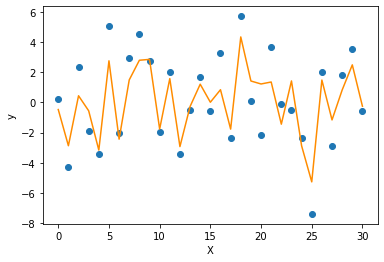

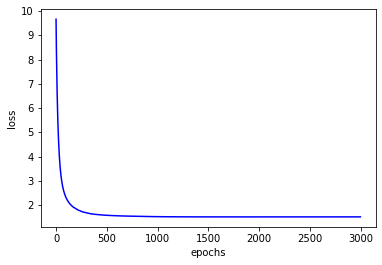

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = np.genfromtxt('./datasets/example.dat', delimiter = ',')
print(data.shape)
print("====================================")

print(data[0])
print("====================================")

# 选择特征与标签
x = data[:,0:100] 
y = data[:,100].reshape(-1,1)
# 加一列
X = np.column_stack((np.ones((x.shape[0],1)),x))

# 划分训练集与测试集
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

# 定义符号函数
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
    
    
# 利用numpy对符号函数进行向量化
vec_sign = np.vectorize(sign)
vec_sign(np.zeros((3,1)))

# 定义lasso损失函数
def l1_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + np.sum(alpha*abs(w))
    dw = np.dot(X.T, (y_hat-y)) /num_train + alpha * vec_sign(w)
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

# 定义训练过程
def lasso_train(X, y, learning_rate=0.01, epochs=300):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l1_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 300 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

"""
# sklearn 的实现
"""
# # 导入线性模型模块
# from sklearn import linear_model
# # 创建lasso模型实例
# sk_lasso = linear_model.Lasso(alpha=0.1)
# # 对训练集进行拟合
# sk_lasso.fit(X_train, y_train)
# # 打印模型相关系数
# print("sklearn Lasso intercept :", sk_lasso.intercept_)
# print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
# print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)



"""
# 主函数，完成整个流程的函数调用
"""
if __name__ == "__main__":
    # 执行训练示例
    loss, loss_list, params, grads = lasso_train(X_train, y_train, 0.01, 3000)

    # predict
    y_pred = predict(X_test, params)
    print(y_pred[:5])
    
    from sklearn.metrics import r2_score
    r2_score(y_pred, y_test)
    
    # 简单绘图
    f = X_test.dot(params['w']) + params['b']
    plt.scatter(range(X_test.shape[0]), y_test)
    plt.plot(f, color = 'darkorange')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    
    # 训练过程中的损失下降
    plt.plot(loss_list, color = 'blue')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  
(3132, 8) (3132, 1) (1045, 8) (1045, 1)
epoch 100 loss 11.769992
epoch 200 loss 10.096498
epoch 300 loss 9.386200
epoch 400 loss 8.934871
epoch 500 loss 8.611395
epoch 600 loss 8.370113
epoch 700 loss 8.187370
epoch 800 loss 8.048079
epoch 900 loss 7.941671
{'w': array([[-0.14790939],
       [ 1.13359729],
       [ 0.91573619],
       [ 0.34874334],
     

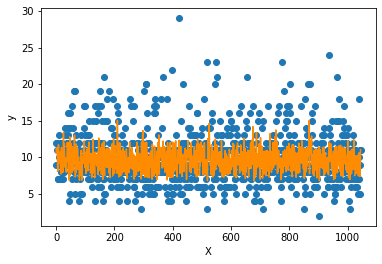

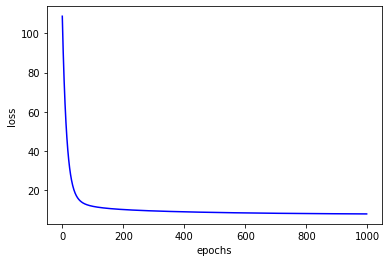

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


data = pd.read_csv('./datasets/abalone.csv')
data['Sex'] = data['Sex'].map({'M':0, 'F':1, 'I':2})
print(data.head())
print("================================")

# 划分数据集
X = data.drop(['Rings'], axis=1)
y = data[['Rings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("===============================")


# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*(np.sum(np.square(w)))
    dw = np.dot(X.T, (y_hat-y)) /num_train + 2*alpha*w
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db


# 定义训练过程
def ridge_train(X, y, learning_rate=0.001, epochs=5000):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

# # 导入线性模型模块
# from sklearn.linear_model import Ridge
# # 创建Ridge模型实例
# clf = Ridge(alpha=1.0)
# # 对训练集进行拟合
# clf.fit(X_train, y_train)
# # 打印模型相关系数
# print("sklearn Ridge intercept :", clf.intercept_)
# print("\nsklearn Ridge coefficients :\n", clf.coef_)
# clf.predict(X_test)[:5]


"""
# 主函数，完成整个流程的函数调用
"""
if __name__ == "__main__":
    # 执行训练示例
    loss, loss_list, params, grads = ridge_train(X_train, y_train, 0.01, 1000)
    
    # 获取训练参数
    print(params)
    
    # predict
    y_pred = predict(X_test, params)
    print(y_pred[:5])
    print(y_test[:5])
    
    # 简单绘图

    f = X_test.dot(params['w']) + params['b']
    plt.scatter(range(X_test.shape[0]), y_test)
    plt.plot(f, color = 'darkorange')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    
    # 训练过程中的损失下降
    plt.plot(loss_list, color = 'blue')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [ ]:
# GBDT Grandient Boosting Decision Tree, 梯度提升决策树
# 集成学习核心算法 GBDT

# Adaboost 算法，改变训练样本的权重来学习多个弱分类器并进行线性组合的过程
# 1、提高前一轮被弱分类器分类错误的样本的权重，降低分类正确的样本权重
# 2、对多个弱分类器进行线性组合，提高分类器效果好的弱分类器的权重，减少分类误差率大的弱分类器权重

# XGBoost 算法 2015年提出，比 GBDT 青出于蓝而胜于蓝
# eXtreme Gradient Boosting, 极端梯度提升树
# 陈天奇《 XGBoost: A Scalable Tree Boosting System 》

# LightGBM 算法，也是 Boosting 算法一种
# Light Gradient Boosting Machine, 轻量的梯度提升机
# 《 LightGBM: A Highly Efficient Gradient Boosting Decision Tree 》
# Histogram 算法  解决特征分裂点 方向进行优化的算法
# GOSS 算法 Gradient-based One-Side Sampling, 单边梯度抽样法  解决样本数量 方向进行优化的算法
# EFB 算法  解决特征数量  方向进行优化的算法
# Leaf-Wise 按层生长的叶子节点的方法
# pip install lightgbm

# CatBoost 算法，创新点在于类别特征处理和排序提升
# 《 CatBoost: unbiased boosting with categorical features 》
# Ordered TS 排序提升算法
# https://github.com/catboost/catboost


# 集成学习框架：Boosting框架 和 Bagging框架
# Bagging 与 随机森林
# Bagging 并行框架


# 最大熵原理 Maximum Entropy Principle 是一种基于信息熵理论的一般原理
# 《 Information Theory and Statistical Mechanics 》
# 最大熵模型求解本质在于求解凸优化问题


# EM 算法 Excepction maximization , 期望最大化算法
# 用于包含隐变量概率模型参数的极大似然估计方法
# 三硬币模型，是 EM 算法的一个经典例子


# CRF, Conditional Random Field , 条件随机场模型
# 概率图模型经典代表之一

# HMM, Hidden Markov Model, 隐马尔可夫模型
# 是一种有隐藏的马尔可夫链随机生成观测序列的过程，经典的概率图模型
# 估计算法 + 学习算法 + 预测算法


# 聚类分析 Cluster Analysis 经典无监督学习算法
# 聚类分析通过特征相似性或者距离的度量方法，将样本自动划分到分类中
# 1、层次聚类法 herarchical Clustering
# 2、K均值聚类 K-means Clustering
# 3、模糊聚类 Fuzzy Clustering
# 4、密度聚类 Density Clustering
# 相似度度量
# 1、Minkowski Distance
# 2、马氏距离，欧氏距离
# 3、相关系数
# 4、余弦夹角


# PCA , principal Component Analysis, 一种经典无监督学习算法
# 通过高维数据降低到低维度数据，可以探索数据内在结构

# 奇异值分解 SVD, Singular Value Decomposition
# 矩阵分解方法，同时也是一种数据降维方法
# SVD 推荐系统中，SVD 图像压缩

# 模特卡洛 Monte Carlo, MC， 方法作为一种统计模型和近似计算方法
# 是一种通过对概率模型随机抽样进行近似数值计算的方法
# 马尔可夫链 Markov Chain, MC，则是一种具备马尔可夫性的随机序列
# 将两者结合，马尔可夫链模特卡洛方法 Markov Chain Monte Carlo，MCMC
# Metropolis-Hasting 算法
# Gibbs 抽样
